In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime 


# Load the S&P Data from Yahoo Finance

In [2]:
sp500 = data.get_data_yahoo('^GSPC',start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2020, 1, 1))


In [3]:
sp500.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,1338.540039,1330.280029,1335.819946,1331.319946,2154480000,1331.319946
2006-10-03,1338.310059,1327.099976,1331.319946,1334.109985,2682690000,1334.109985
2006-10-04,1350.199951,1331.479980,1333.810059,1350.199951,3019880000,1350.199951
2006-10-05,1353.790039,1347.750000,1349.839966,1353.219971,2817240000,1353.219971
2006-10-06,1353.219971,1344.209961,1353.219971,1349.589966,2523000000,1349.589966


In [4]:
sp500.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3335.000000,3335.000000,3335.000000,3335.000000,3.335000e+03,3335.000000
mean,1791.322804,1771.700445,1781.918515,1782.236734,3.896616e+09,1782.236734
std,614.119634,613.078465,613.663054,613.697196,1.114269e+09,613.697196
min,695.270020,666.789978,679.280029,676.530029,8.325500e+08,676.530029
25%,1319.739990,1302.599976,1312.109985,1311.640015,3.224545e+09,1311.640015
50%,1624.260010,1606.770020,1612.150024,1614.420044,3.659820e+09,1614.420044
75%,2167.054932,2151.479980,2161.945068,2162.430054,4.290565e+09,2162.430054
max,3247.929932,3234.370117,3247.229980,3240.020020,1.145623e+10,3240.020020


# 1)  Closing Prices Plot

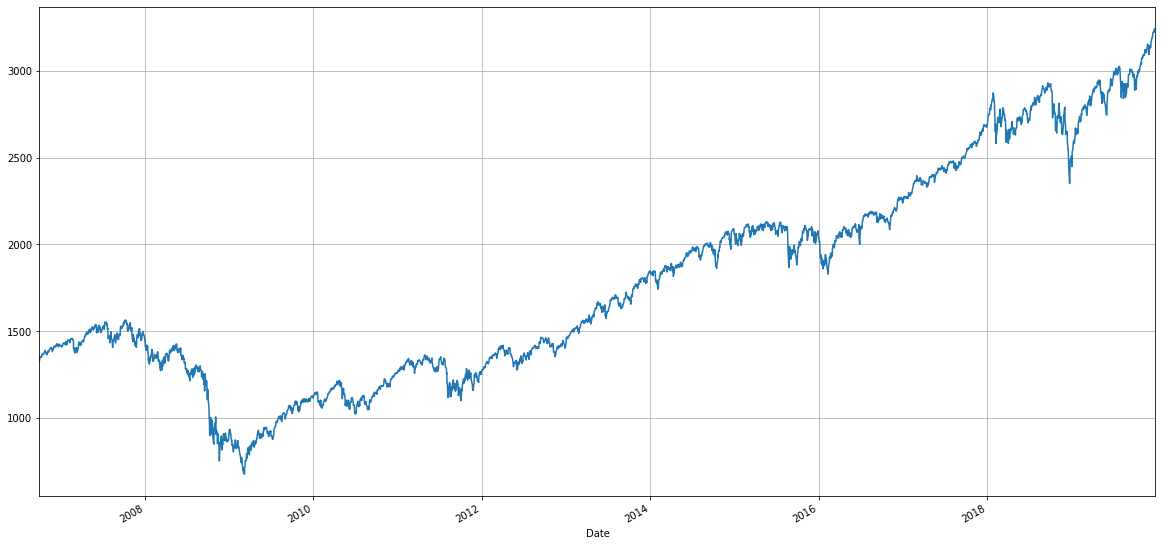

In [5]:
sp500['Close'].plot(grid=True,figsize=(20,10))


### The amount of percentage change in the value of a stock over a single day of trading

In [6]:
daily_close = sp500[['Adj Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03   0.002096
2006-10-04   0.012060
2006-10-05   0.002237
2006-10-06  -0.002682
2006-10-09   0.000793
2006-10-10   0.002043
2006-10-11  -0.002564
2006-10-12   0.009541
2006-10-13   0.002047
2006-10-16   0.002519
2006-10-17  -0.003659
2006-10-18   0.001283
2006-10-19   0.000849
2006-10-20   0.001200
2006-10-23   0.006152
2006-10-24   0.000261
2006-10-25   0.003514
2006-10-26   0.004963
2006-10-27  -0.008452
2006-10-30   0.000428
2006-10-31   0.000007
2006-11-01  -0.007351
2006-11-02  -0.000344
2006-11-03  -0.002223
2006-11-06   0.011346
2006-11-07   0.002218
2006-11-08   0.002083
2006-11-09  -0.005333
2006-11-10   0.001865
...               ...
2019-11-18   0.000503
2019-11-19  -0.000593
2019-11-20  -0.003756
2019-11-21  -0.001583
2019-11-22   0.002175
2019-11-25   0.007507
2019-11-26   0.002196
2019-11-27   0.004174
2019-11-29  -0.004011
2019-12-02  -0.008631
2019-12-03  -0.006638
2019-12-04   0.006324
2019-12-05

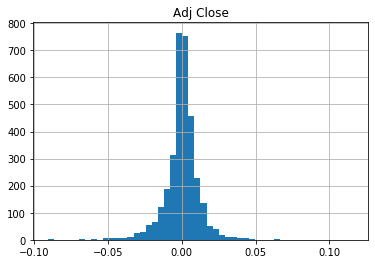

In [7]:
# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()


# 2) Closing Prices and Moving Averages plot

#### Let's define our moving averages

In [8]:
#Short term window: 42 Days
short_term = 42
#Long term window: 252 Days
long_term = 252

sp500['42d'] = np.round(sp500['Close'].rolling(window=short_term).mean(),2)
sp500['252d'] = np.round(sp500['Close'].rolling(window=long_term).mean(),2)

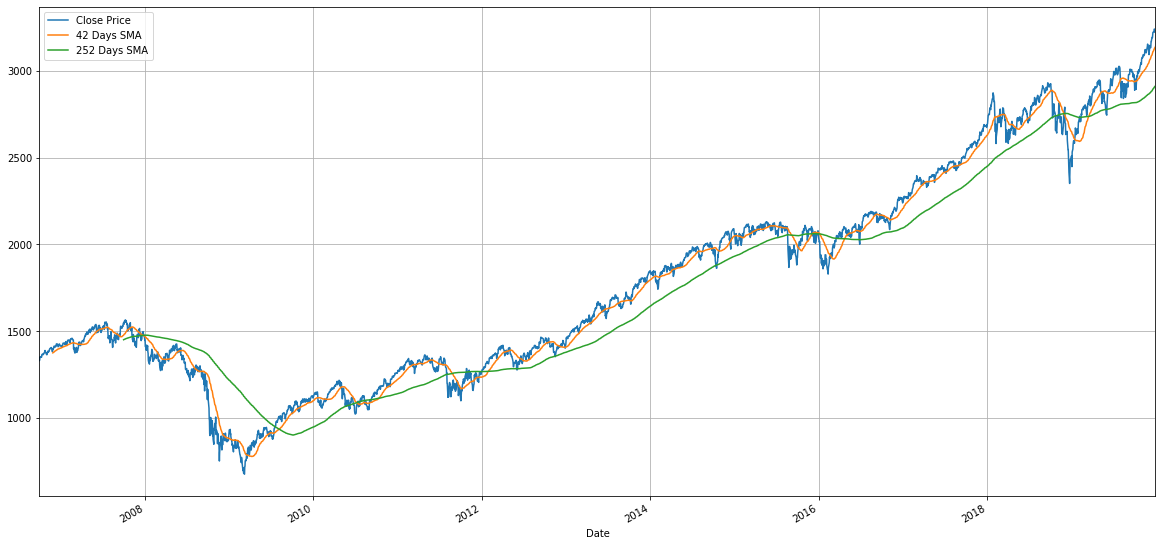

In [9]:
fig, ax = plt.subplots()
sp500[['Close','42d','252d']].plot(grid=True,figsize=(20,10), ax=ax)
ax.legend(["Close Price", "42 Days SMA", "252 Days SMA"])


# 3) Trading Strategy: SMA Crossover

##### 1- When the 42d SMA is for the first time X points above the 252d SMA, we will close any existing short position and go long (buy) one unit of the asset.
##### 2- When the 42d SMA is for the first time X points below the 252d SMA, we will close any existing long position and go short (sell) one unit of the asset.

In [10]:
sp500['42-252'] = sp500['42d'] - sp500['252d']


In [11]:
# X is the Buy/Sell signal threshold
X = 50

sp500['Signal'] = np.where((sp500['42-252'] > X) | (sp500['42-252'] < -X), 1, 0) 
sp500['Signal'].value_counts()

1    2517
0     818
Name: Signal, dtype: int64

##### 1 is the buy signal: the 42d moving average is for the first time X points above the 252d tend
##### -1 is the sell signal: the 42d moving average is for the first time X points below the 252d trend.
##### 0 Park in Cash 

In [12]:
sp500['Positions'] = sp500.Signal.diff()
sp500['Positions'].value_counts()


 0.0    3305
 1.0      15
-1.0      14
Name: Positions, dtype: int64

In [13]:
#  1 is the buy signal: the 42d moving average is for the first time X points above the 252d tend = go long
# -1 is the sell signal: the 42d moving average is for the first time X points below the 252d trend = exit
# 0 Park in Cash 
sp500['Stance'] = np.where(sp500['42-252'] > X, 1, 0)
sp500['Stance'] = np.where(sp500['42-252'] < -X, -1, sp500['Stance'])
sp500['Stance'].value_counts()

 1    1990
 0     818
-1     527
Name: Stance, dtype: int64

527 On 1001 trading dates the 42d moving average lies more than 50 points below the 252d moving average, and on 1990 the 42d moving average lies more than 50 points above the 252d moving average.

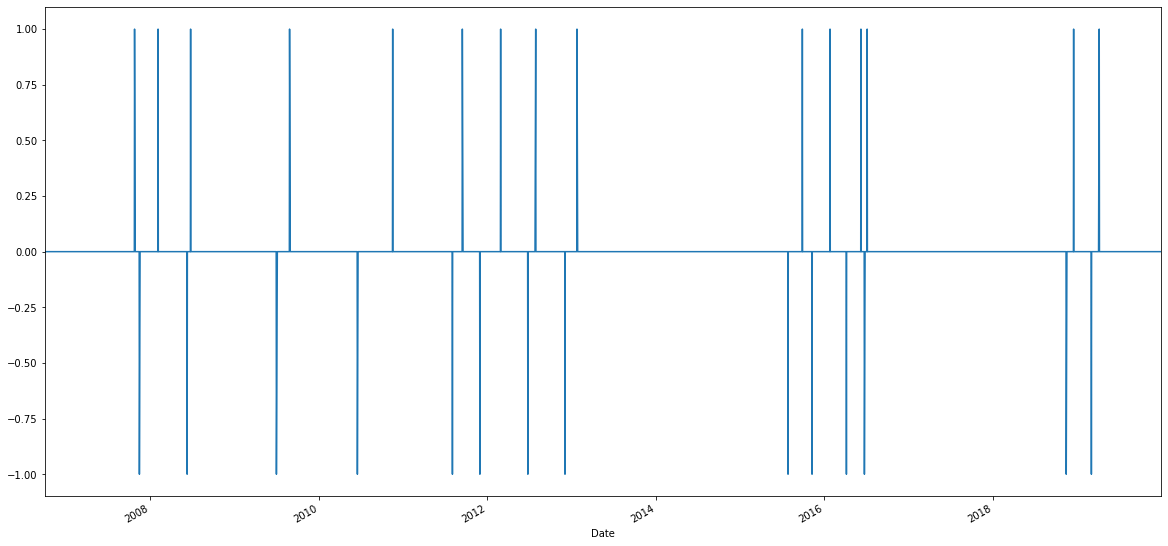

In [14]:
sp500['Positions'].plot(lw=1.5,ylim=[-1.1,1.1],figsize=(20,10))


#### Representation of the Buy and Sell Signals

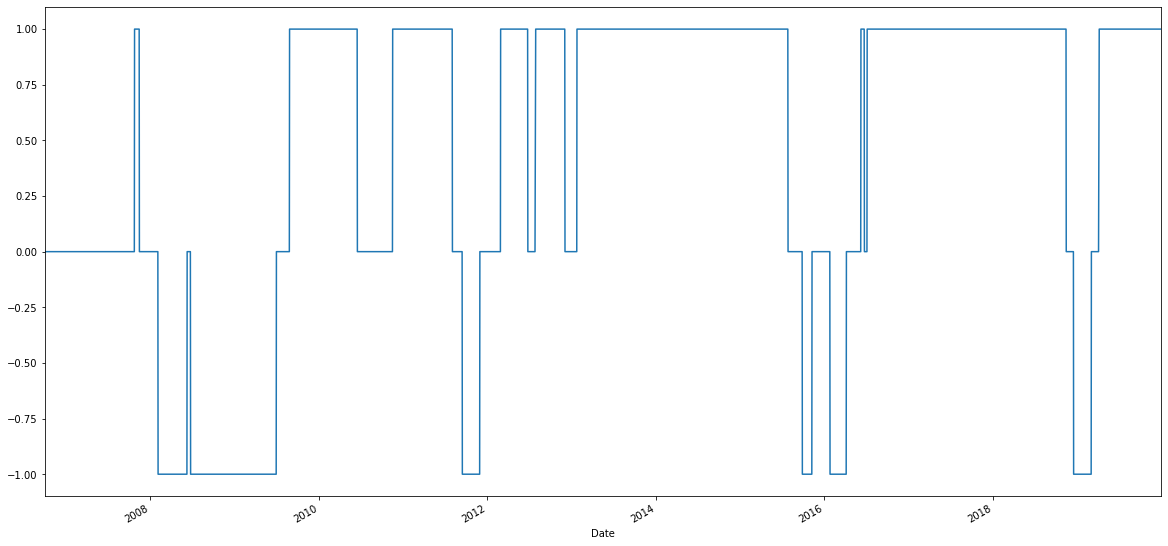

In [15]:
sp500['Stance'].plot(lw=1.5,ylim=[-1.1,1.1],figsize=(20,10))


#### Plot the Buy and Sell Positions

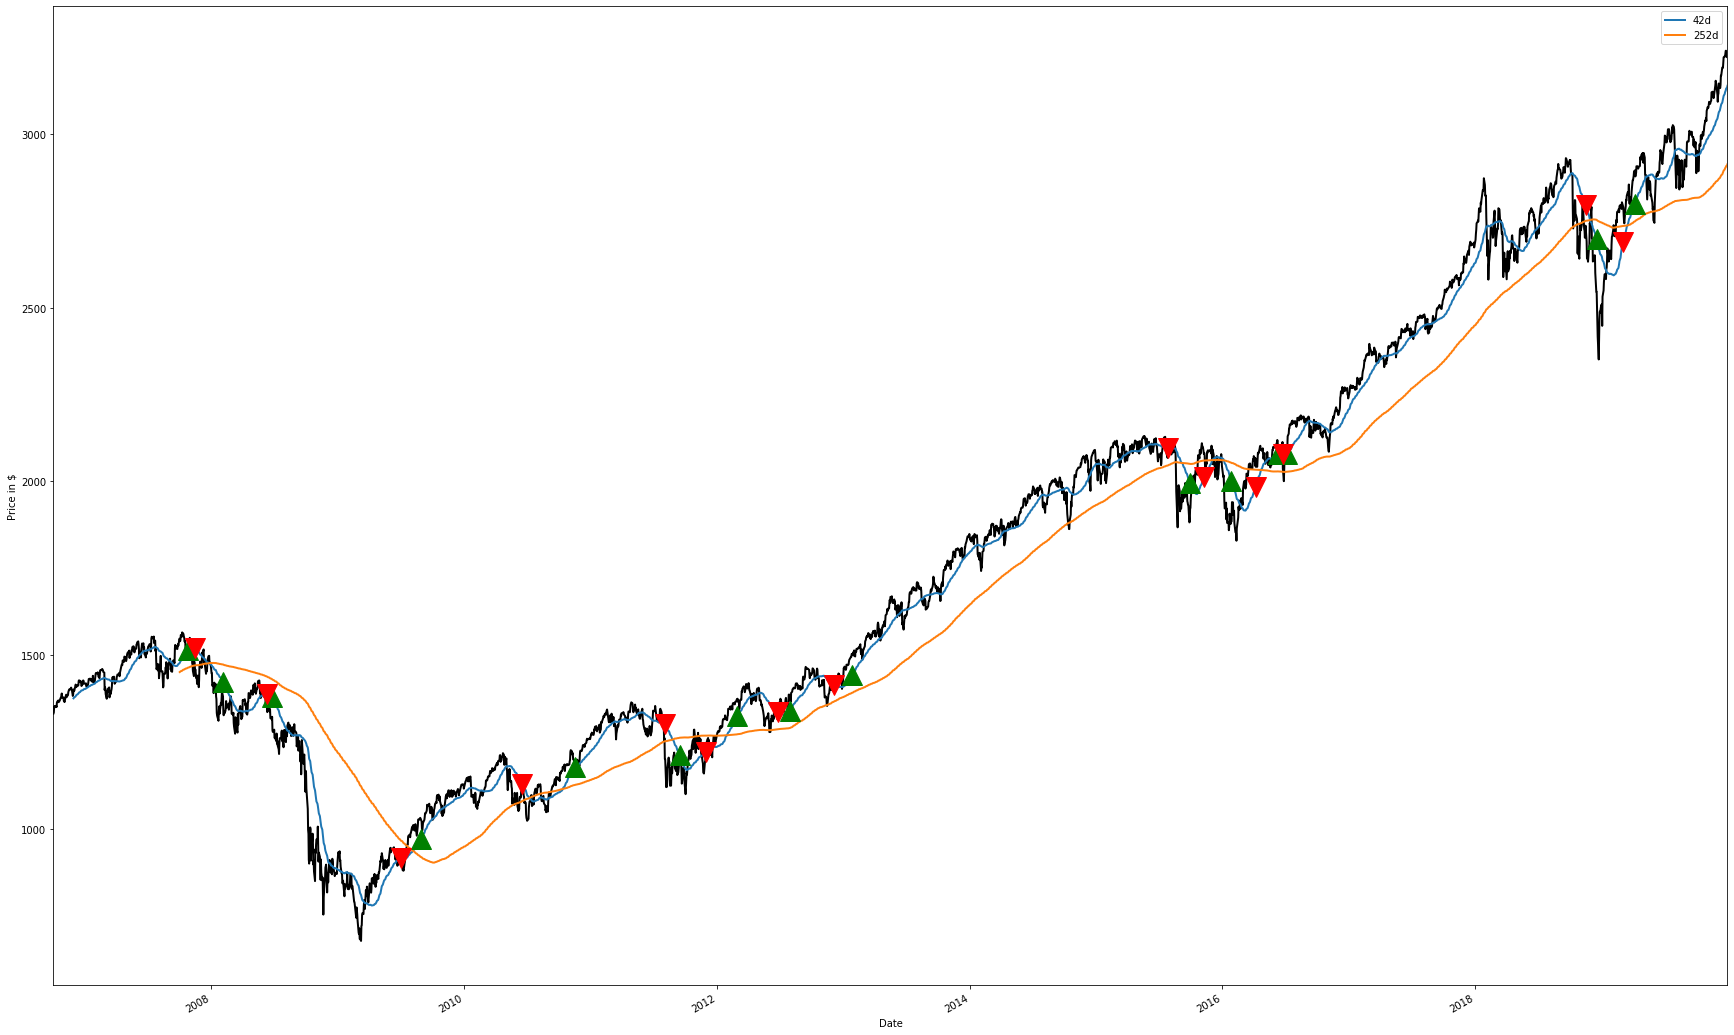

In [16]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(111, ylabel='Price in $')
sp500['Close'].plot(ax=ax1, color ='black', lw=2.)
sp500[['42d','252d']].plot(ax=ax1, lw=2.)
#Plot the Buy signals
ax1.plot(sp500.loc[sp500.Positions == 1.0].index, 
        sp500['42d'][sp500.Positions == 1.0],
        '^',markersize=20, color='g')

#Plot the Sell signals
ax1.plot(sp500.loc[sp500.Positions == -1.0].index, 
        sp500['42d'][sp500.Positions == -1.0],
        'v',markersize=20, color='r')

plt.show()

# 4) Backtesting: Test the Investment Strategy

#### Let's assume for simplicity that the S&P500 index can be bought or sold directly and that there are no transaction costs

In [17]:
sp500['Market Returns'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500['Strategy Returns'] = sp500['Market Returns'] * sp500['Stance'].shift(1)

In [18]:
sp500.tail()

,High,Low,Open,Close,Volume,Adj Close,42d,252d,42-252,Signal,Positions,Stance,Market Returns,Strategy Returns
Date,,,,,,,,,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883,3120.50,2901.52,218.98,1,0.0,1,-0.000195,-0.000195
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912,3125.68,2904.58,221.10,1,0.0,1,0.005115,0.005115
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,3130.45,2907.56,222.89,1,0.0,1,0.000034,0.000034
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039,3134.84,2910.48,224.36,1,0.0,1,-0.005798,-0.005798
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029,3139.22,2913.36,225.86,1,0.0,1,0.002942,0.002942


#   

## A) The Log Returns of the S&P500 VS Returns on the SMA crossover strategy 

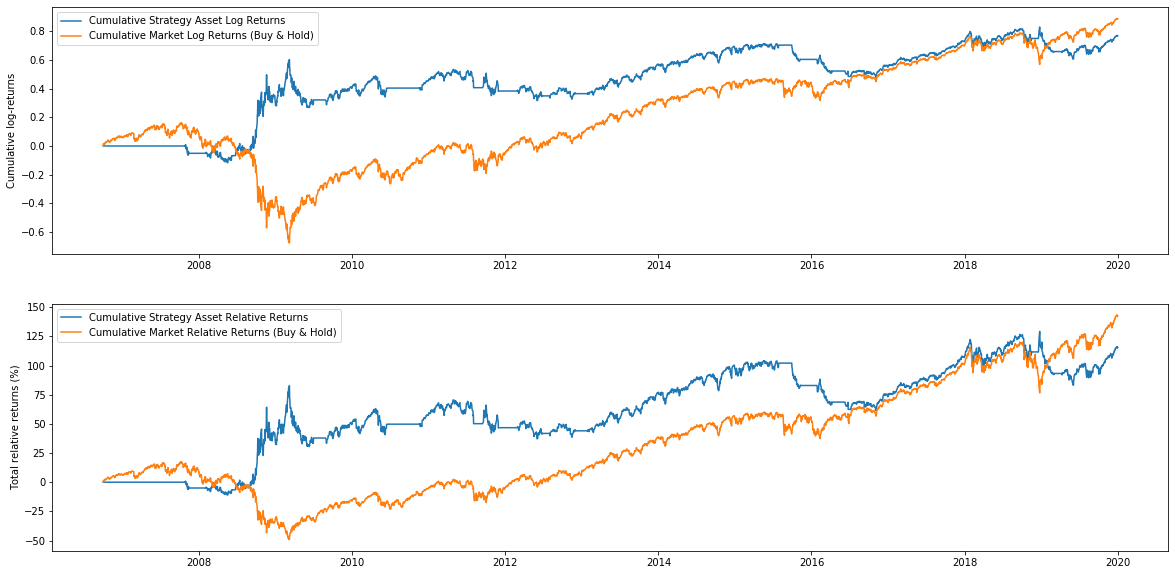

In [19]:
cum_strategy_asset_log_returns = sp500['Strategy Returns'].cumsum()
cum_market_log_returns = sp500['Market Returns'].cumsum()

cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1
cum_market_relative_returns = np.exp(cum_market_log_returns) - 1


fig, ax = plt.subplots(2, 1, figsize=((20,10)))

#ax[0].xaxis.set_major_formatter(my_year_month_fmt)
ax[0].plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns, label='Cumulative Strategy Asset Log Returns')
ax[0].plot(cum_market_log_returns.index, cum_market_log_returns, label='Cumulative Market Log Returns (Buy & Hold)')
ax[0].set_ylabel('Cumulative log-returns')
ax[0].legend(loc='best')


ax[1].plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns, label='Cumulative Strategy Asset Relative Returns')
ax[1].plot(cum_market_relative_returns.index, 100*cum_market_relative_returns, label='Cumulative Market Relative Returns (Buy & Hold)')

ax[1].set_ylabel('Total relative returns (%)')
ax[1].legend(loc='best')
#ax2.xaxis.set_major_formatter(my_year_month_fmt)




#### Although the strategy seems to perform rather well during market downturns, it doesn’t do so well during market rallies or when it is just trending upwards. Over the test period it barely outperforms a simple buy and hold strategy.

## B) Portfolio Simulation 

In [20]:
initial_capital = float(100000)
positions = pd.DataFrame(index=sp500.Signal.index).fillna(0.0)

In [21]:
positions.head()

""
Date
2006-10-02
2006-10-03
2006-10-04
2006-10-05
2006-10-06


In [22]:
#buy 10 shares
positions['Position in S&P500'] = 10*sp500.Signal
portfolio = positions.multiply(sp500['Close'], axis=0)
pos_dif = positions.diff()
portfolio['holdings'] = (positions.multiply(sp500['Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_dif.multiply(sp500['Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['holdings'] + portfolio['cash']
portfolio['returns'] = portfolio['total'].pct_change()



In [23]:
portfolio.tail()

,Position in S&P500,holdings,cash,total,returns
Date,,,,,
2019-12-24,32233.798828,32233.798828,84846.900024,117080.698853,-0.000054
2019-12-26,32399.099121,32399.099121,84846.900024,117245.999146,0.001412
2019-12-27,32400.200195,32400.200195,84846.900024,117247.100220,0.000009
2019-12-30,32212.900391,32212.900391,84846.900024,117059.800415,-0.001597
2019-12-31,32307.800293,32307.800293,84846.900024,117154.700317,0.000811


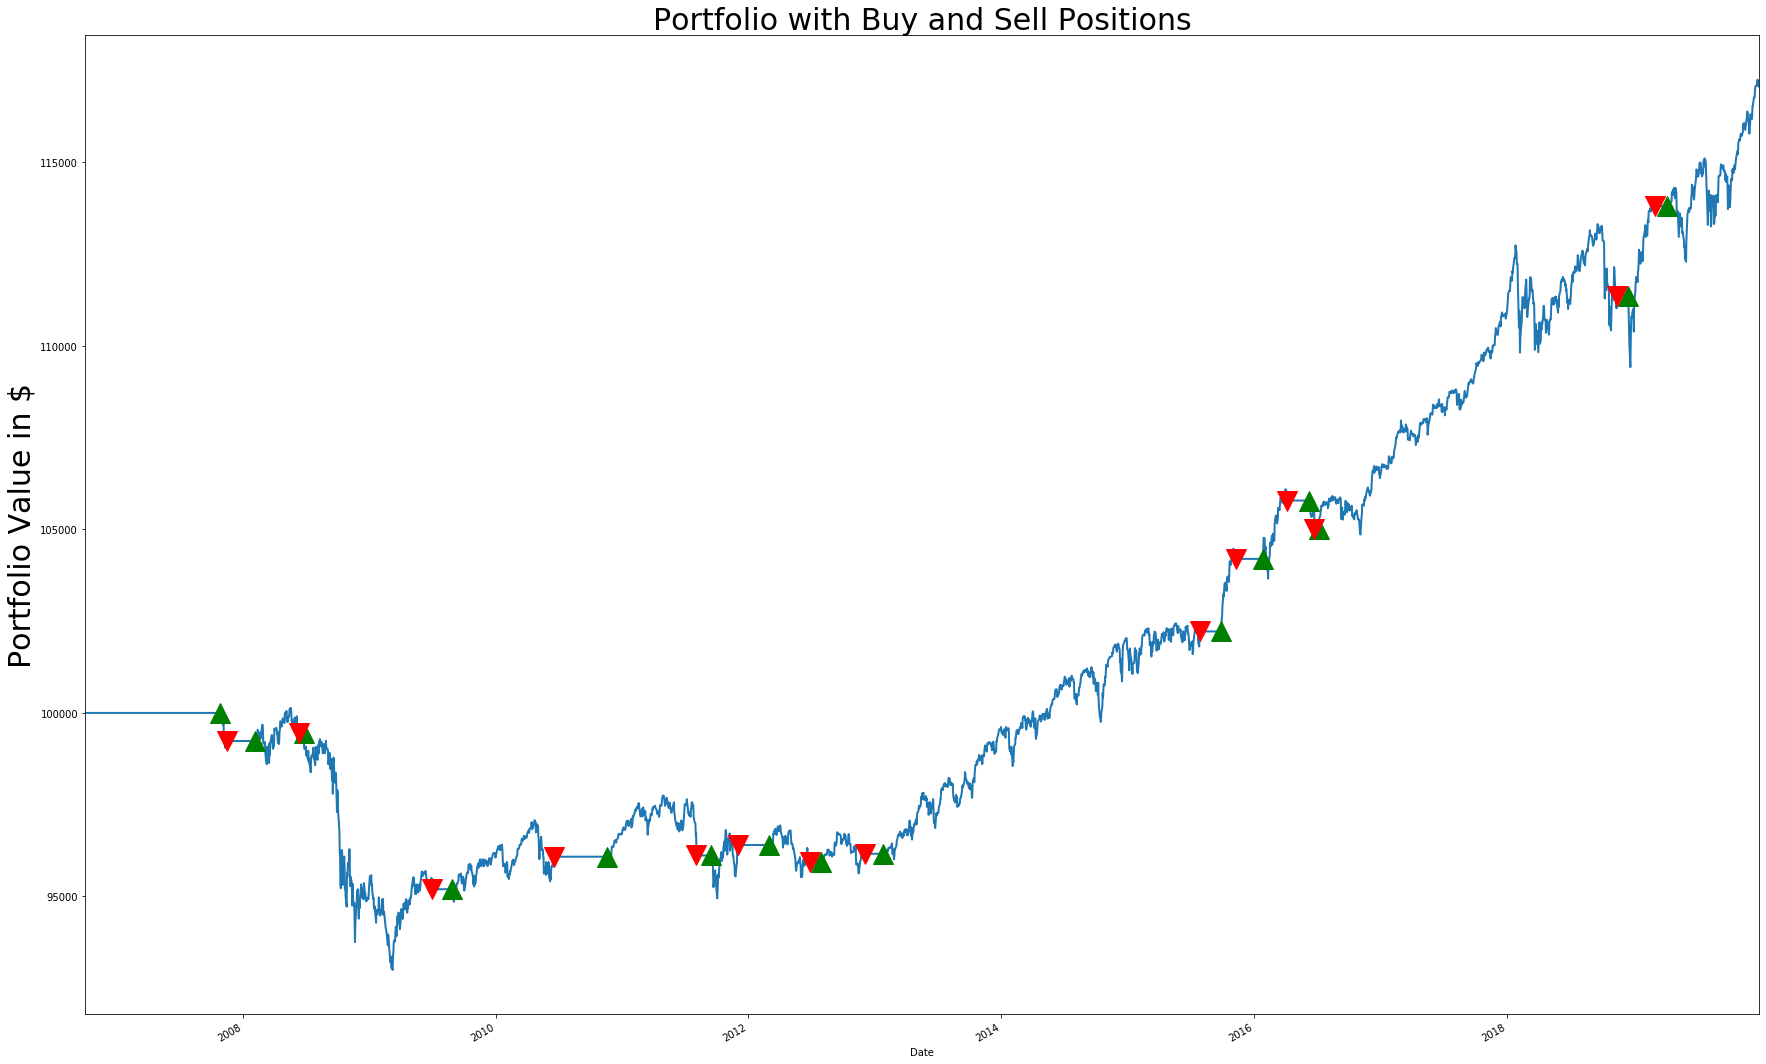

In [24]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(30,20))
ax1.set_ylabel('Portfolio Value in $', fontsize=30)  
portfolio['total'].plot(ax=ax1,  lw=2.)
#Plot the Buy signals
ax1.plot(portfolio.loc[sp500.Positions == 1.0].index, 
        portfolio.total[sp500.Positions == 1.0],
        '^',markersize=20, color='g')

#Plot the Sell signals
ax1.plot(portfolio.loc[sp500.Positions == -1.0].index, 
        portfolio.total[sp500.Positions == -1.0],
        'v',markersize=20, color='r')
plt.title('Portfolio with Buy and Sell Positions',fontsize=30)
plt.show()

### Total Portfolio value

In [26]:
print(portfolio.total.tail(1))

Date
2019-12-31    117154.700317
Name: total, dtype: float64


### Absolute value

In [30]:

print(((portfolio.total.tail(1)/float(100000))-float(1))*100)

Date
2019-12-31    17.1547
Name: total, dtype: float64
